In [46]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

In [47]:
FILE_PATH = "../Data/numerical.csv"

In [48]:
df = pd.read_csv(FILE_PATH, encoding='utf-8')

In [49]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2.000,170.0,False,Li-Ion,3400.0,4,1.30,13.0,2.0,32.0
1,Acer,Liquid Z6 Plus,Android,3.000,250.0,True,Li-Po,4080.0,8,1.30,13.0,5.0,32.0
2,Acer,Liquid Z6,Android,1.000,120.0,True,Li-Ion,2000.0,4,1.25,8.0,2.0,8.0
3,Acer,Iconia Tab 10 A3-A40,Android,2.000,230.0,False,Li-Ion,NaN,4,1.30,5.0,2.0,64.0
4,Acer,Liquid X2,Android,3.000,230.0,True,Li-Po,4020.0,8,1.30,13.0,13.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,ZTE,Grand X LTE T82,Android,1.000,340.0,True,Li-Ion,1900.0,2,1.50,8.0,1.3,4.0
2083,ZTE,Grand X V970,Android,1.000,230.0,True,Li-Ion,1600.0,1,1.00,5.0,0.6,4.0
2084,ZTE,Optik,Android,1.000,230.0,False,Li-Ion,4000.0,2,1.20,5.0,2.0,16.0
2085,ZTE,Light Tab 2 V9A,Android,0.512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,0.6,4.0


## Eliminar nan

In [50]:
df = df.dropna()

In [51]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2.000,170.0,False,Li-Ion,3400.0,4,1.30,13.0,2.0,32.0
1,Acer,Liquid Z6 Plus,Android,3.000,250.0,True,Li-Po,4080.0,8,1.30,13.0,5.0,32.0
2,Acer,Liquid Z6,Android,1.000,120.0,True,Li-Ion,2000.0,4,1.25,8.0,2.0,8.0
4,Acer,Liquid X2,Android,3.000,230.0,True,Li-Po,4020.0,8,1.30,13.0,13.0,32.0
5,Acer,Liquid Zest Plus,Android,2.000,200.0,False,Li-Ion,5000.0,4,1.30,13.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,ZTE,Grand X LTE T82,Android,1.000,340.0,True,Li-Ion,1900.0,2,1.50,8.0,1.3,4.0
2083,ZTE,Grand X V970,Android,1.000,230.0,True,Li-Ion,1600.0,1,1.00,5.0,0.6,4.0
2084,ZTE,Optik,Android,1.000,230.0,False,Li-Ion,4000.0,2,1.20,5.0,2.0,16.0
2085,ZTE,Light Tab 2 V9A,Android,0.512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,0.6,4.0


### Convertir columnas str a valores numéricos

In [52]:
cols = ['brand', 'OS', 'battery_removable', 'battery_type']

In [53]:
le = preprocessing.LabelEncoder()

# apply "le.fit_transform"
df_encoded = df[cols].apply(le.fit_transform)

In [54]:
df_encoded

,brand,OS,battery_removable,battery_type
0,0,1,0,0
1,0,1,1,1
2,0,1,1,0
4,0,1,1,1
5,0,1,0,0
...,...,...,...,...
2082,58,1,1,0
2083,58,1,1,0
2084,58,1,0,0
2085,58,1,0,0


In [55]:
df_numerical = df.drop(cols, axis=1)
df_numerical

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0
4,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0
5,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...
2082,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0
2083,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0
2084,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0
2085,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0


In [56]:
categorical_df = df_numerical.join(df_encoded)

In [57]:
categorical_df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type
0,Iconia Talk S,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0,0,1,0,0
1,Liquid Z6 Plus,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0,0,1,1,1
2,Liquid Z6,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0,0,1,1,0
4,Liquid X2,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0,0,1,1,1
5,Liquid Zest Plus,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Grand X LTE T82,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0,58,1,1,0
2083,Grand X V970,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0,58,1,1,0
2084,Optik,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0,58,1,0,0
2085,Light Tab 2 V9A,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0,58,1,0,0


In [58]:
df_clases = categorical_df.drop('model', axis=1)
df_clases

,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type
0,2.000,170.0,3400.0,4,1.30,13.0,2.0,32.0,0,1,0,0
1,3.000,250.0,4080.0,8,1.30,13.0,5.0,32.0,0,1,1,1
2,1.000,120.0,2000.0,4,1.25,8.0,2.0,8.0,0,1,1,0
4,3.000,230.0,4020.0,8,1.30,13.0,13.0,32.0,0,1,1,1
5,2.000,200.0,5000.0,4,1.30,13.0,5.0,16.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2082,1.000,340.0,1900.0,2,1.50,8.0,1.3,4.0,58,1,1,0
2083,1.000,230.0,1600.0,1,1.00,5.0,0.6,4.0,58,1,1,0
2084,1.000,230.0,4000.0,2,1.20,5.0,2.0,16.0,58,1,0,0
2085,0.512,250.0,3400.0,1,1.40,3.2,0.6,4.0,58,1,0,0


# Normalizar

In [59]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
from sklearn.decomposition import PCA




X = df_clases[['approx_price_EUR', 'CPU_speed', 'battery_mah', 'primary_camera_mp', 'secondary_camera_mp', 'RAM']]
y = df_clases['CPU_cores']


In [60]:
X

,approx_price_EUR,CPU_speed,battery_mah,primary_camera_mp,secondary_camera_mp,RAM
0,170.0,1.30,3400.0,13.0,2.0,2.000
1,250.0,1.30,4080.0,13.0,5.0,3.000
2,120.0,1.25,2000.0,8.0,2.0,1.000
4,230.0,1.30,4020.0,13.0,13.0,3.000
5,200.0,1.30,5000.0,13.0,5.0,2.000
...,...,...,...,...,...,...
2082,340.0,1.50,1900.0,8.0,1.3,1.000
2083,230.0,1.00,1600.0,5.0,0.6,1.000
2084,230.0,1.20,4000.0,5.0,2.0,1.000
2085,250.0,1.40,3400.0,3.2,0.6,0.512


In [61]:
target_names = pd.unique(df_clases['CPU_cores'])

In [62]:
target_names

array([ 4,  8,  6,  2,  1,  3, 10])

In [63]:
scaler.fit(X)
X = scaler.transform(X)
X

array([[-0.11969382, -0.29464018,  0.46857374,  0.9556202 , -0.30807539,
         0.44851023],
       [-0.00688612, -0.29464018,  0.9460362 ,  0.9556202 ,  0.65416328,
         1.43226962],
       [-0.19019864, -0.42170959, -0.51443721, -0.16180231, -0.30807539,
        -0.53524916],
       ...,
       [-0.03508805, -0.548779  ,  0.88986415, -0.83225581, -0.30807539,
        -0.53524916],
       [-0.00688612, -0.04050136,  0.46857374, -1.23452791, -0.75712011,
        -1.01532375],
       [-0.06328997, -1.05705663, -0.93572762, -0.83225581, -0.94956784,
        -1.01532375]])

# PCA

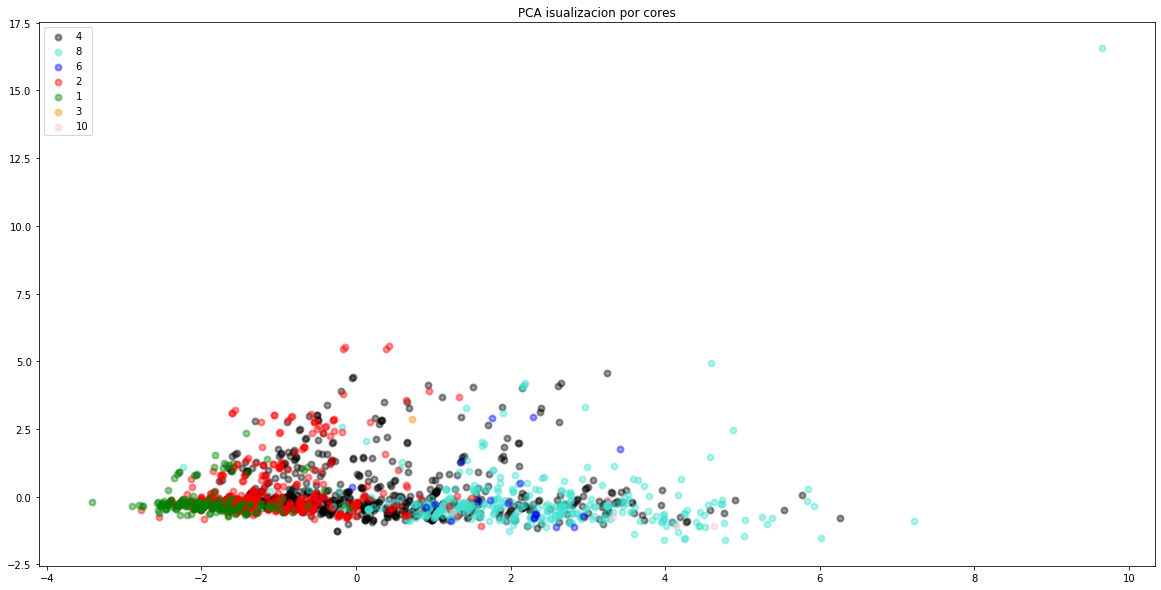

In [64]:


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'pink']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA isualizacion por cores')
plt.show()

# Isomap

In [65]:
from sklearn import manifold

In [66]:
n_neighbors = 20
X_iso = manifold.Isomap(n_neighbors=n_neighbors, 
                        n_components=2).fit_transform(X)

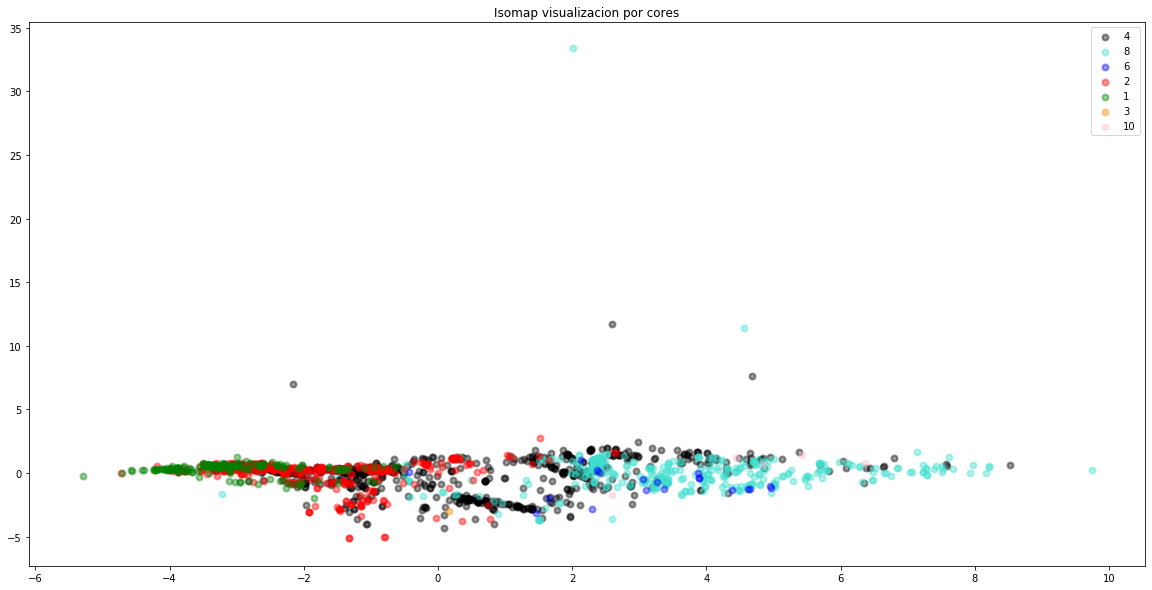

In [67]:

plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'pink']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_iso[y == i, 0], X_iso[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Isomap visualizacion por cores')
plt.show()